<h3>선형 모델</h3>

In [1]:
%matplotlib inline
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

w[0]: 0.393906  b: -0.031804


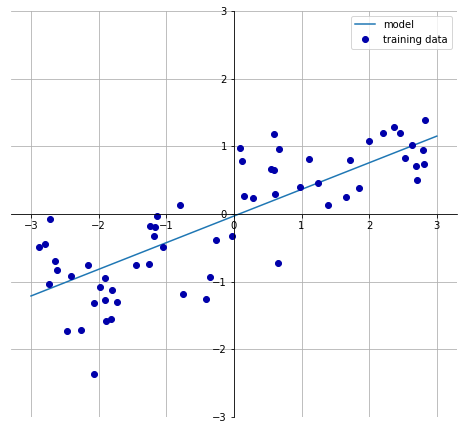

In [2]:
mglearn.plots.plot_linear_regression_wave()

<h3>선형 회귀 (Linear regression, 최소 제곱법)</h3>

<b>선형회귀</b>(linear regression) 또는 <b>최소제곱법</b>
OLS, ordinary least square)은 가장 간단하고 오래된 회귀용 선형 알고리즘.
Train set과 Test set에 있는 y 사이의 <b>평균제곱오차</b>(mean square error)를 최소화하는 파라미터 w와 b를 찾는다.
예측값과 타깃값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈것.
선형회귀는 매개변수가 없는 것이 장점이지만 모델의 복잡도를 제어할수 없음

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x, y = mglearn.datasets.make_wave(n_samples=60)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

lr = LinearRegression().fit(x_train, y_train)

기울기 파라미터(w)는 가중치(weight) 또는 개수(coefficient)라고 하며 lr 객체의 coef_ 속성에 저장되어 있고 편향(offset) 또는 절편(intercept) 파라미터(b)는 intercept_ 속성에 저장되어 있다

In [4]:
print('lr.coef_:{}'.format(lr.coef_))
print('lr.intercetp_:{}'.format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercetp_:-0.031804343026759746


추정된 intercept_ 속성은 항상 float 값 하나만 존재하지만, 추정된 coef_ 속성은 각 입력 특성에 하나씩 대응되는 Numpy 배열이다.<br/>
wave 데이터셋에서는 입력 특성이 하나뿐이므로 lr.coef_도 원소를 하나만 가지고 있다.

In [5]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


R^2 값이 0.66인건 좋은 결과는 아님.<br/>
훈련 세트와 테스트 세트의 결과가 비슷하다는 것은 Underfiting을 의미.<br/>
1차원 데이터셋에서는 모델이 매우 단순하므로 Overfiting을 걱정할 필요없음.<br/>
그러나 특성이 많은 고차원 데이터 셋에서는 선형 모델이 성능이 매우 높아져서 Overfiting이 될 가능성이 높음.

![Underfiting Overfiting](./img/overfit_underfit.PNG)

<h3>데이터셋 분석</h3>

1970년대 미국 보스턴의 주택 가격 데이터이다. load_boston() 명령으로 로드하며 다음과 같이 구성되어 있다.<br/><br/>

1) 타겟 데이터<br/>
    - 1978 보스턴 주택 가격
    - 506 타운의 주택 가격 중앙값 (단위 1,000 달러)
2) 특징 데이터<br/>
    - CRIM: 범죄율
    - ZN: 25,000 평방피트를 초과 거주지역 비율
    - INDUS: 비소매상업지역 면적 비율
    - CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
    - NOX: 일산화질소 농도
    - RM: 주택당 방 수
    - AGE: 1940년 이전에 건축된 주택의 비율
    - DIS: 직업센터의 거리
    - RAD: 방사형 고속도로까지의 거리
    - TAX: 재산세율
    - PTRATIO: 학생/교사 비율
    - B: 인구 중 흑인 비율
    - LSTAT: 인구 중 하위 계층 비율  

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


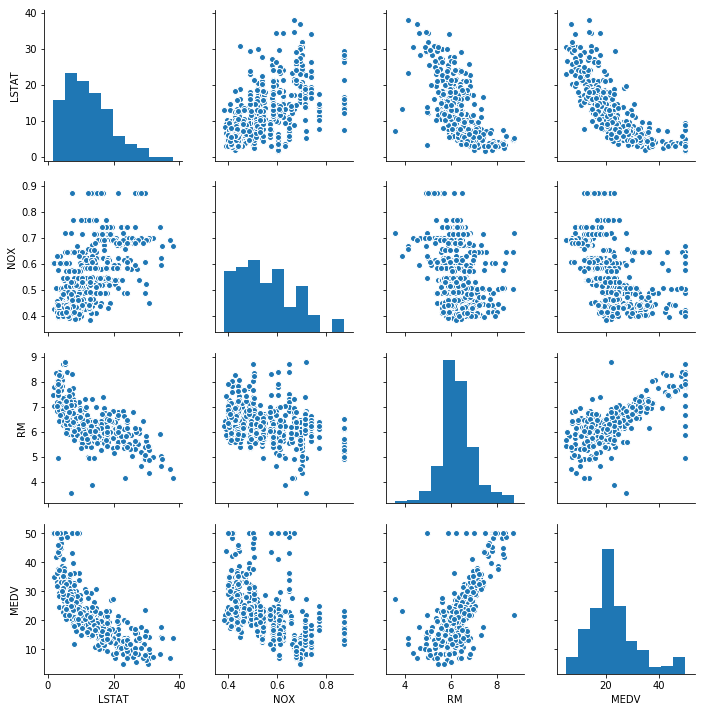

In [9]:
import seaborn as sns
cols = ["LSTAT", "NOX", "RM", "MEDV"]
sns.pairplot(df[cols])
plt.show()

<h3>복잡한 데이터셋 사용</h3>

보스턴 하우스 주택가격 (복잡한 데이터셋)<br/>
- 원래 3개의 원래 특성에 13개에서 2개씩 (중복을 포함해) 짝지은 91개의 특성을 더해 총 104개가 된다
<br/>
- 데이터셋에 전체 샘플이 506개<br/>
- 특성이 유도된 것을 합쳐 105개

In [12]:
x, y = mglearn.datasets.load_extended_boston()
print(x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
print('학습 세트 개수:', len(x_train))
print('테스트 세트 개수:', len(x_test))
lr = LinearRegression().fit(x_train, y_train)

(506, 104)
학습 세트 개수: 379
테스트 세트 개수: 127


테스트 R^2 값이 매우 낮다. 이는 Overfiting을 의미함.<br/>
모델의 복잡도를 제어할 수 있는 모델이 필요함!

In [9]:
print('훈련 세트 점수: {:.2f}'.format(lr.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lr.score(x_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


![complexity](./img/model_complexity.PNG)

<h4>Overfiting 해결 방법</h4>
<br/>
1) 모델의 복잡도 줄이기<br/>
2) 정규화 (Regularization)

<h3>릿지 회귀 (Ridge regression)</h3>

Ridge도 회귀를 위한 선형모델.<br/>
최소적합법에 사용한 것과 같은 예측 함수를 사용<br/>
Ridge regression에서 가중치(w) 선택은 훈련 데이터를 잘 예측뿐 아니라 추가 제약 조건을 만족시키기 위함.<br/> 
즉, 가중치(w)의 절댓값을 가능한 작게 만드는 것이 목표!<br/>
모든 특성이 출력에 주는 영향을 최소한으로 만듬(== 기울기를 작게 만듬, Regularization)<br/></br>

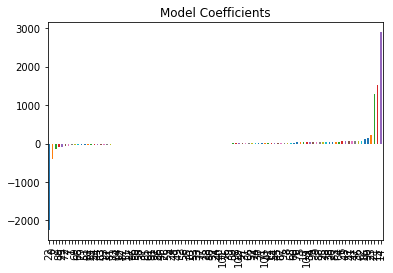

In [11]:
import pandas as pd
import numpy as np

predictors = np.arange(len(lr.coef_))
coef = pd.Series(lr.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Regularization은 Overfiting이 되지 않도록 모델을 강제로 제한함.<br/>
Ridge regression에서 사용하는 Regularization은 L2 regularization.

![ridge_cost](./img/ridge_cost.PNG)

양 끝단의 coef_ 계수가 다른 계수들에 비해 월등히 높다! 이는 두 특성에 의하여 집값 예측이 크게 변동될 수 있다는 것을 의미!

In [8]:
from sklearn.linear_model import Ridge

# default: alpha=1.0
ridge = Ridge().fit(x_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge.score(x_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


훈련 세트에서의 점수는 LinearRegression보다 낮지만, 테스트 세트에서 점수는 더 높다!
Linear regression은 이 데이터셋에서 overfiting되지만, ridge는 덜 자유로운 모델이기 때문에 overfiting이 적다.

In [9]:
# alpha 값을 높이면 모델을 더 단순하게 만듬.(w에 대한 penalty 증가, w를 0에 가깝게 만듬.)
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge10.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge10.score(x_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [10]:
# penalty가 없으면 linear regression과 같음
ridge0 = Ridge(alpha=0).fit(x_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge0.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge0.score(x_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.60


In [11]:
# Best alpha 선택
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(ridge01.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(ridge01.score(x_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


alpha가 증가하면 제약이 더 많은 모델이니 coef_의 절댓값 크기가 작을 것이라 예상.<br/>
아래 그래프의 x축: coef_의 원소를 위치대로 나열<br/>
x=0은 첫번째 특성에 연관된 weight의 크기<br/>
x=1은 두번째 특성에 연관된 weight의 크기<br/>
....<br/>
x=100<br/><br/>
y축은 각 weight의 수치<br/>
alpha=10이면 -3 ~ 3사이에 위치함<br/>
alpha=1이면 weight range가 더 커짐

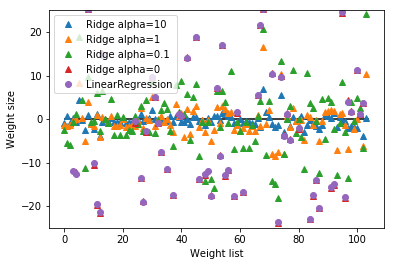

In [13]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, '^', label='Ridge alpha=1')
plt.plot(ridge01.coef_, '^', label='Ridge alpha=0.1')
plt.plot(ridge0.coef_, '^', label='Ridge alpha=0')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Weight list')
plt.ylabel('Weight size')
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

Regularization의 효과를 확인하기 위한 다른 방법.<br/>
alpha를 고정하고, 훈련 데이터의 크기를 변화시켜보는 것!<br/><br/>

데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 <b>학습 곡선</b>(learning curve)이라고 함.

1) 모든 데이터셋에 대해 Ridge와 Linear regression 모두 훈련세트의 점수가 테스트 세트의 점수보다 높다.<br/>
2) Ridge 훈련데이터 점수는 Regularization이 적용되어, Ridge의 훈련데이터 점수가 전반적으로 Linear regression 점수보다 낮다. 그러나 테스트 데이터에서는 Ridge의 점수가 더 높으며 특별히 작은 데이터셋에서는 더 그럼.<br/>
3) 두 모델의 성능은 데이터가 많아 질수록 좋아지고 마지막에는 Linear regression이 Ridge를 따라잡음. -> 데이터가 충분하면 Regularization 항이 상대적으로 덜 중요해짐.<br/>
4) Linear regression 훈련 데이터가 많아 질 수록 점수가 낮아짐 -> 이것은 데이터가 많아질 수록 모델이 데이터를 기억하거나 Overfiting하기 어려워지기 떄문.

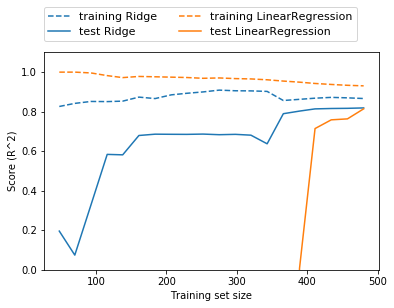

In [14]:
mglearn.plots.plot_ridge_n_samples()

<h3>라쏘 (Lasso)</h3>

Ridge regression과 같이 Lasso도 계수를 0에 가깝게 만듬<br/>
하지만 L2 regularization이 아니라 <b>L1 regularization</b>을 사용<br/>
L2는 0에 가깝게 regularization되는데 L1은 진짜로 w가 0이 됨<br/>
이 말은 어떤 X는 완전히 제외된다는 말임 (auto feature selection)
<br/>-> 해당 모델의 중요한 특성을 발견할 수 있다!

![lasso_cost](./img/lasso_cost.PNG)

In [17]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(x_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso.score(x_test, y_test)))
print('사용한 특성의 수: {0}'.format(np.sum(lasso.coef_ != 0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


Lasso는 훈련 세트와 테스트 세트 모두에서 결과가 좋지 않다.<br/>
이는 underfiting이며 105개 특성 중 4개만 사용한 것을 볼 수 있음<br/>
Lasso도 alpha 속성을 지원함.(default=1.0)<br/><br/>

Underfiting을 줄이기 위해서 alpha값을 줄여보자 (max_iter=반복 실행 최대횟수)<br/>

In [21]:
# max_iter 기본값을 증가 시키지 않으면 max_iter값을 늘리라는 경고가 발생함
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(x_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso001.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso001.score(x_test, y_test)))
print('사용한 특성의 수: {0}'.format(np.sum(lasso001.coef_ != 0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


alpha 값을 더 낮추면 모델 복잡도가 증가하여 성능이 증가.<br/>
너무 낮추면 Regularization 효과가 없어져 Overfiting이 되어 Linear regression과 결과가 비슷해짐.

In [22]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(x_train, y_train)
print('훈련 세트 점수: {:.2f}'.format(lasso00001.score(x_train, y_train)))
print('테스트 세트 점수: {:.2f}'.format(lasso00001.score(x_test, y_test)))
print('사용한 특성의 수: {0}'.format(np.sum(lasso00001.coef_ != 0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 94


Text(0,0.5,'weight size')

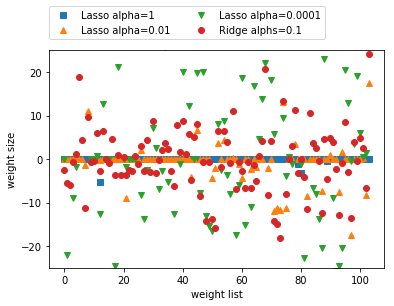

In [28]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alphs=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('weight list')
plt.ylabel('weight size')

1) alpha=1, w 대부분 특성이 0일 뿐만 아니라 w range가 작다<br/>
2) alpha=0.01, w 대부분 특성이 0이 되는 분포를 가짐(정삼각형 모양)<br/>
3) alpha=0.0001, w 대부분이 0이 아니고 w size range가 크다. Regularization 효과가 적음<br/>
4) Ridge alpha=0.1, Lasso alpha=0.1은 성능이 비슷하지만 Ridge를 사용하면 어떤 w도 0이 되지 않음<br/>
5) 실제로 두 모델 중 Ridge regression을 더 선호, 하지만 특성이 많고 그 일부분만 중요하다면 Lasso가 더 좋음<br/> 또 Lasso가 입력 특성 중 일부만 사용하므로 쉽게 해석할 수 있는 모델을 만들어 줄 것<br/>
6) 참고로 Ridge(L2 norm) + Lasso(L1 norm) = ElasticNet도 존재

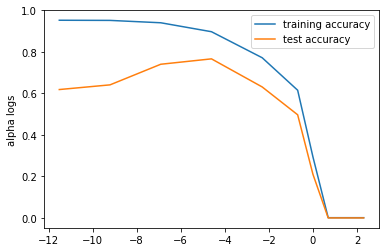

In [29]:
training_accuracy = []
test_accuracy = []

alpha_settings = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 2, 4, 8, 10]

for alpha in alpha_settings:
    # build the model
    lasso = Lasso(alpha=alpha, max_iter=10000000)
    lasso.fit(x_train, y_train)
    # record training accuracy
    training_accuracy.append(lasso.score(x_train, y_train))
    # record generalization accuracy
    test_accuracy.append(lasso.score(x_test, y_test))
    
plt.plot(np.log(np.array(alpha_settings)),
        training_accuracy, label="training accuracy")
plt.plot(np.log(np.array(alpha_settings)),
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.ylabel("alpha logs")
plt.legend()

<h3>Convex funtion</h3>

-3.0 74.666664
-2.9000000000000004 70.98
-2.8000000000000003 67.386665
-2.7 63.88667
-2.6 60.479992
-2.5 57.166668
-2.4000000000000004 53.946674
-2.3000000000000003 50.819996
-2.2 47.78667
-2.1 44.84666
-2.0 42.0
-1.9000000000000001 39.24667
-1.8 36.586666
-1.7000000000000002 34.02
-1.6 31.546667
-1.5 29.166666
-1.4000000000000001 26.88
-1.3 24.686666
-1.2000000000000002 22.586668
-1.1 20.580002
-1.0 18.666666
-0.9 16.846666
-0.8 15.12
-0.7000000000000001 13.486667
-0.6000000000000001 11.946668
-0.5 10.5
-0.4 9.146666
-0.30000000000000004 7.886667
-0.2 6.72
-0.1 5.646666
0.0 4.6666665
0.1 3.78
0.2 2.986667
0.30000000000000004 2.2866664
0.4 1.68
0.5 1.1666666
0.6000000000000001 0.7466666
0.7000000000000001 0.42000008
0.8 0.18666661
0.9 0.04666671
1.0 0.0
1.1 0.04666671
1.2000000000000002 0.18666677
1.3 0.41999987
1.4000000000000001 0.7466665
1.5 1.1666666
1.6 1.6800003
1.7000000000000002 2.2866673
1.8 2.986666
1.9000000000000001 3.78
2.0 4.6666665
2.1 5.646666
2.2 6.720001
2.30000000000

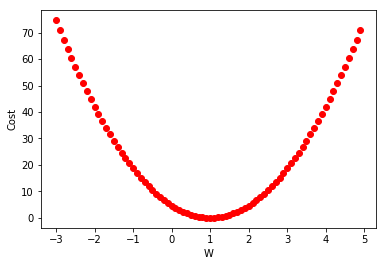

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt


X = [1.,2.,3.]
Y = [1.,2.,3.]
m = n_samples = len(X)

# Set model weights
W = tf.placeholder(tf.float32)

# Construct a linear model
hypothesis = tf.multiply(X, W)

# Cost function
cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2))/(m)

# initializing the variables
init = tf.global_variables_initializer()

# For graph
W_val = []
cost_val = []

# Launch the graph
sess = tf.Session()
sess.run(init)
for i in range(-30, 50):
    print( i*0.1, sess.run(cost, feed_dict={W: i*0.1}))
    W_val.append( i*0.1)
    cost_val.append(sess.run(cost, feed_dict={W: i*0.1}))

# Graphic display
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()